In [52]:
from datasets import load_dataset
import pandas as pd

from collections import defaultdict 
from tqdm import tqdm
from wordcloud import WordCloud


dataset = load_dataset("conll2003")


Reusing dataset conll2003 (C:\Users\Yang Li\.cache\huggingface\datasets\conll2003\conll2003\1.0.0\63ba56944e35c1943434322a07ceefd79864672041b7834583709af4a5de4664)


In [2]:
dataset['train'].features['ner_tags']

Sequence(feature=ClassLabel(num_classes=9, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], names_file=None, id=None), length=-1, id=None)

In [3]:
df = pd.DataFrame(dataset['train'])
df['sentence_length'] = df.tokens.apply(lambda x: len(x))
df.head()

,chunk_tags,id,ner_tags,pos_tags,tokens,sentence_length
0,"[11, 21, 11, 12, 21, 22, 11, 12, 0]",0,"[3, 0, 7, 0, 0, 0, 7, 0, 0]","[22, 42, 16, 21, 35, 37, 16, 21, 7]","[EU, rejects, German, call, to, boycott, Briti...",9
1,"[11, 12]",1,"[1, 2]","[22, 22]","[Peter, Blackburn]",2
2,"[11, 12]",2,"[5, 0]","[22, 11]","[BRUSSELS, 1996-08-22]",2
3,"[11, 12, 12, 21, 13, 11, 11, 21, 13, 11, 12, 1...",3,"[0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, ...","[12, 22, 22, 38, 15, 22, 28, 38, 15, 16, 21, 3...","[The, European, Commission, said, on, Thursday...",30
4,"[11, 11, 12, 13, 11, 12, 12, 11, 12, 12, 12, 1...",4,"[5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, ...","[22, 27, 21, 35, 12, 22, 22, 27, 16, 21, 22, 2...","[Germany, 's, representative, to, the, Europea...",31


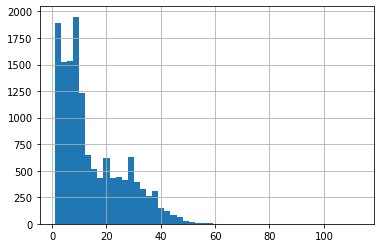

In [4]:
df.sentence_length.hist(bins = 50)

In [49]:
ner_tag = ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']
tag_count = defaultdict(int)
for i in df.ner_tags:
    for j in i:
        tag_count[ner_tag[j]] += 1

In [50]:
df_tag_count = pd.DataFrame.from_dict(tag_count, 'index').sort_values(by =0)
df_tag_count.columns = ['counts']

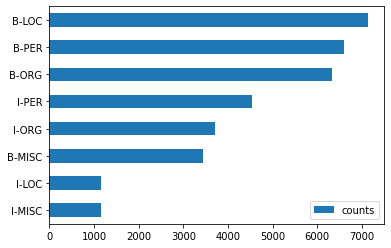

In [51]:
df_tag_count.iloc[:-1,:].plot.barh()

In [66]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [70]:
stopwords = set(STOPWORDS) 
wordcloud  = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text) 

In [71]:
text = ' '.join(list(df.tokens.explode()))

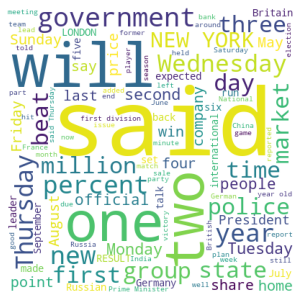

In [73]:
plt.figure(figsize = (4,4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 